In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("pet_adoption_data.csv")

# Basic info
print("Data Summary:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nAdoptionLikelihood value counts:")
print(df['AdoptionLikelihood'].value_counts())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB
None

Missing Values:
PetID                 0
PetType               0
Breed     

In [2]:
# Fill missing values for cleaner analysis
df.fillna({
    'Vaccinated': 'Unknown',
    'HealthCondition': 'Unknown',
    'PreviousOwner': 'No'
}, inplace=True)

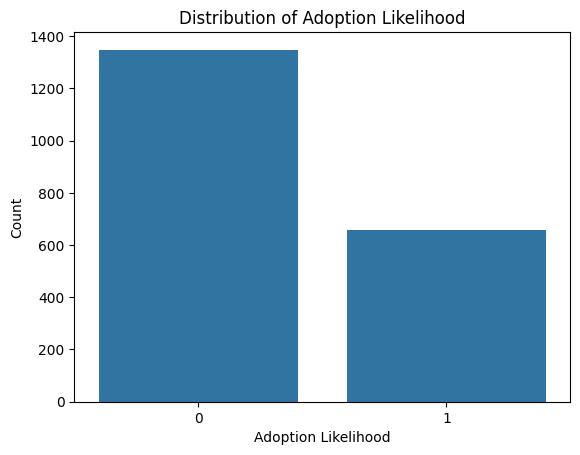

In [3]:
# -----------------------------
#  Distribution of Adoption Likelihood
# -----------------------------
sns.countplot(x='AdoptionLikelihood', data=df)
plt.title('Distribution of Adoption Likelihood')
plt.xlabel('Adoption Likelihood')
plt.ylabel('Count')
plt.show()

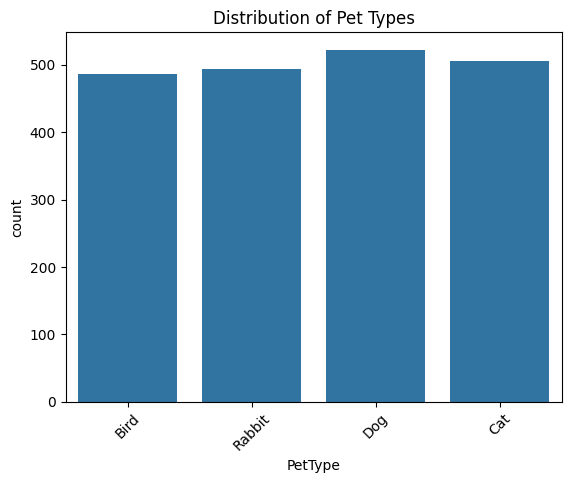

In [4]:
# -----------------------------
#  Pet Type Distribution
# -----------------------------
sns.countplot(x='PetType', data=df)
plt.title('Distribution of Pet Types')
plt.xticks(rotation=45)
plt.show()

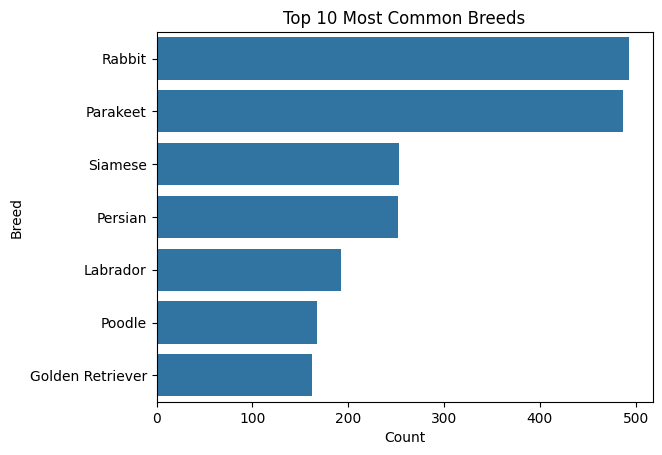

In [5]:
# -----------------------------
#  Most Common Breeds
# -----------------------------
top_breeds = df['Breed'].value_counts().nlargest(10)
sns.barplot(x=top_breeds.values, y=top_breeds.index)
plt.title('Top 10 Most Common Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.show()


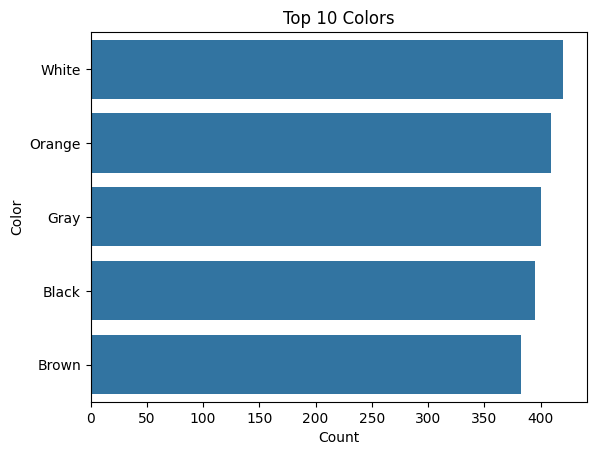

In [6]:
# -----------------------------
# Color Distribution
# -----------------------------
top_colors = df['Color'].value_counts().nlargest(10)
sns.barplot(x=top_colors.values, y=top_colors.index)
plt.title('Top 10 Colors')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

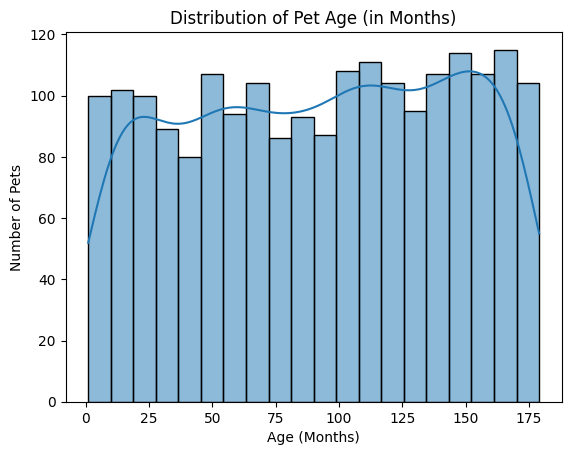

In [7]:
# -----------------------------
# Age Distribution
# -----------------------------
sns.histplot(df['AgeMonths'], bins=20, kde=True)
plt.title('Distribution of Pet Age (in Months)')
plt.xlabel('Age (Months)')
plt.ylabel('Number of Pets')
plt.show()


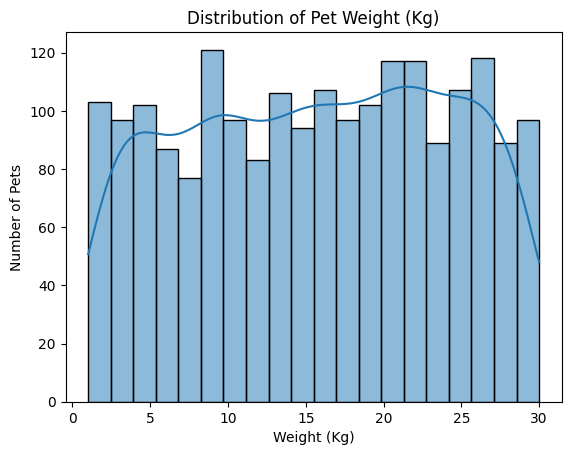

In [8]:
# -----------------------------
# Weight Distribution
# -----------------------------
sns.histplot(df['WeightKg'], bins=20, kde=True)
plt.title('Distribution of Pet Weight (Kg)')
plt.xlabel('Weight (Kg)')
plt.ylabel('Number of Pets')
plt.show()

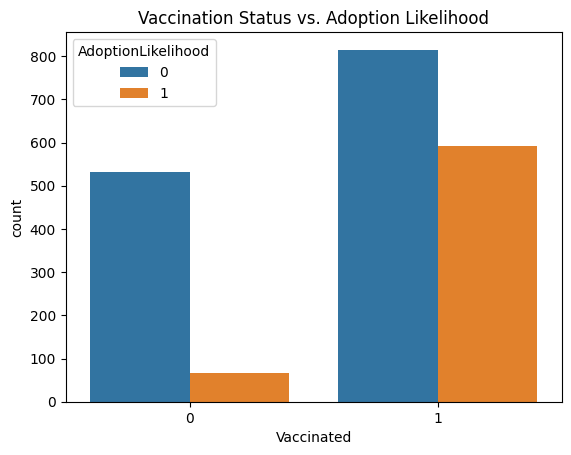

In [9]:
# -----------------------------
# Vaccinated vs Adoption
# -----------------------------
sns.countplot(x='Vaccinated', hue='AdoptionLikelihood', data=df)
plt.title('Vaccination Status vs. Adoption Likelihood')
plt.show()

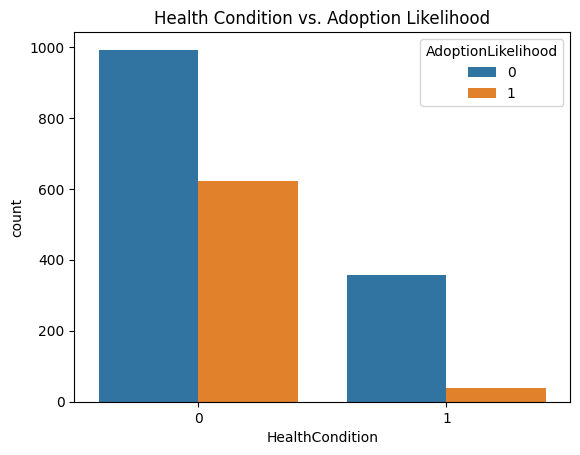

In [10]:
# -----------------------------
# Health Condition vs Adoption
# -----------------------------
sns.countplot(x='HealthCondition', hue='AdoptionLikelihood', data=df)
plt.title('Health Condition vs. Adoption Likelihood')
plt.show()

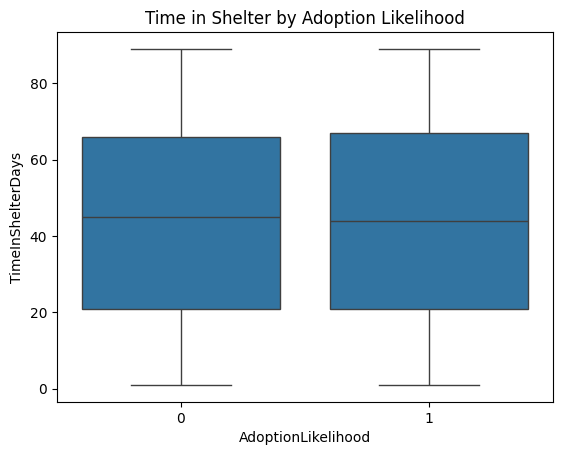

In [11]:
# -----------------------------
# Time in Shelter vs Adoption Likelihood
# -----------------------------
sns.boxplot(x='AdoptionLikelihood', y='TimeInShelterDays', data=df)
plt.title('Time in Shelter by Adoption Likelihood')
plt.show()

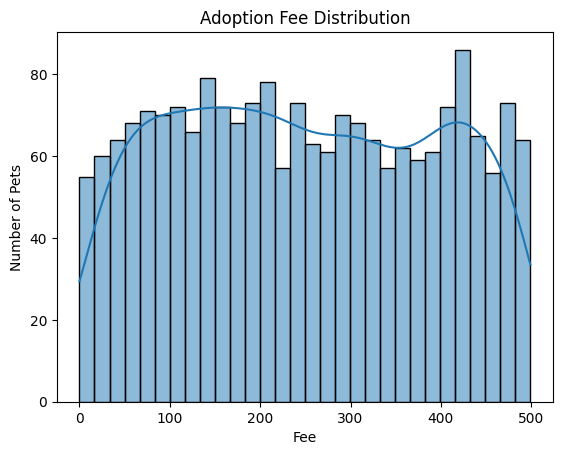

In [12]:
# -----------------------------
# Adoption Fee Distribution
# -----------------------------
sns.histplot(df['AdoptionFee'], bins=30, kde=True)
plt.title('Adoption Fee Distribution')
plt.xlabel('Fee')
plt.ylabel('Number of Pets')
plt.show()


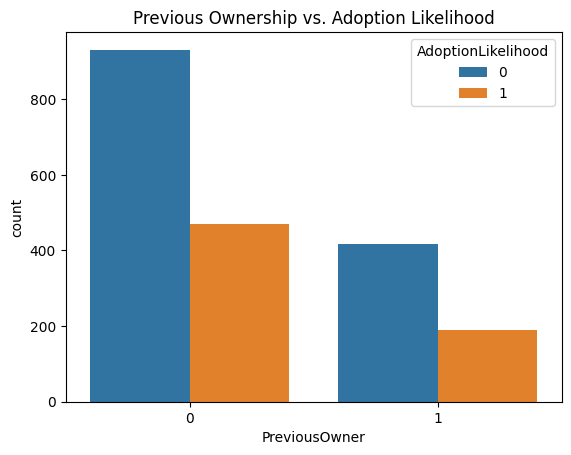

In [13]:
# -----------------------------
# Previous Owner vs Adoption
# -----------------------------
sns.countplot(x='PreviousOwner', hue='AdoptionLikelihood', data=df)
plt.title('Previous Ownership vs. Adoption Likelihood')
plt.show()

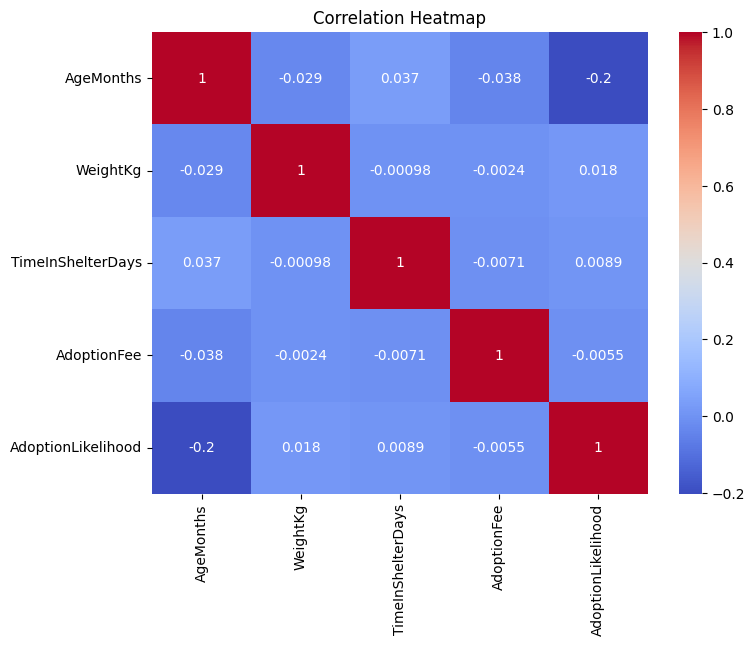

In [14]:
# -----------------------------
# Correlation Heatmap (Numeric only)
# -----------------------------
numeric_cols = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee', 'AdoptionLikelihood']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()